# <b> <font color = Blue>  Feature Engineering and Polynomial Regression </font> </b>

feature engineering and polynomial regression which allows you to use the machinery of linear regression to fit very complicated, even very non-linear functions.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from Gradient_Descent import Compute_Gradient_Descent
sys.path.append('Deeplearning_Material/')
from lab_utils_multi import zscore_normalize_features,run_gradient_descent_feng
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays
print("Run Successfully ")

Run Successfully 


<a name='PolynomialFeatures'></a>
## Polynomial Features

Above we were considering a scenario where the data was non-linear. Let's try using what we know so far to fit a non-linear curve. We'll start with a simple quadratic: $y = 1+x^2$

You're familiar with all the routines we're using. They are available in the lab_utils.py file for review. We'll use [`np.c_[..]`](https://numpy.org/doc/stable/reference/generated/numpy.c_.html) which is a NumPy routine to concatenate along the column boundary.

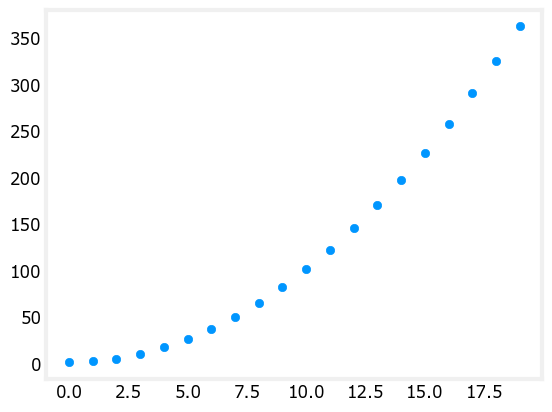

In [8]:
#taking input variables as 0 to 19
X_Train_temp = np.arange(0,20)
# print(X_Train_temp)

# now taking output as or target variable as square of individual values of x
Y_Train = 1 + (X_Train_temp)**2
# print("Y_Train \n",Y_Train)

# converting x into a column vector or a single column matrix 
X_Train = X_Train_temp.reshape(-1,1) #(-1(no constra))in on rows,1(one column only))
# print("X_Train \n",X_Train)

plt.scatter(X_Train,Y_Train)
plt.show()

In [9]:
#now lets try to fit a linear equation in this data 
#Compute_Gradient_Descent(x, y, w_in, b_in, iteration, alpha, ):

temp_W, temp_B, _ =  Compute_Gradient_Descent(X_Train,Y_Train,0,0,1000,1e-2)
# now lets pridect the Yhat from same data which was taken during tranning
Yhat = X_Train*temp_W + temp_B
print("\n\n Yhat = \n",Yhat)

Iteration 0: Cost [1657.56]
Iteration 100: Cost [694.55]
Iteration 200: Cost [588.48]
Iteration 300: Cost [526.41]
Iteration 400: Cost [490.1]
Iteration 500: Cost [468.86]
Iteration 600: Cost [456.43]
Iteration 700: Cost [449.16]
Iteration 800: Cost [444.9]
Iteration 900: Cost [442.41]


 Yhat = 
 [[-52.08]
 [-33.39]
 [-14.69]
 [  4.01]
 [ 22.71]
 [ 41.41]
 [ 60.11]
 [ 78.8 ]
 [ 97.5 ]
 [116.2 ]
 [134.9 ]
 [153.6 ]
 [172.29]
 [190.99]
 [209.69]
 [228.39]
 [247.09]
 [265.78]
 [284.48]
 [303.18]]


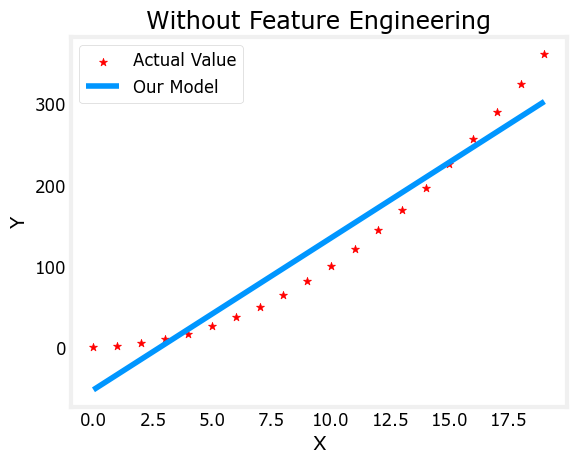

In [10]:
# now lets plot out linear regression as well as data ponts

plt.title("Without Feature Engineering")
plt.scatter(X_Train,Y_Train,marker='*',c="RED", label="Actual Value")
plt.plot(X_Train,Yhat,label = "Our Model")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

here we can clearly see that our model is trained so badly that it doesn't fit even in the data points given 

Well, as expected, not a great fit. What is needed is something like $y= w_0x_0^2 + b$, or a **polynomial feature**.
To accomplish this, you can modify the *input data* to *engineer* the needed features. If you swap the original data with a version that squares the $x$ value, then you can achieve $y= w_0x_0^2 + b$. Let's try it. Swap `X` for `X**2` below:

Iteration 0: Cost [7329.22]
Iteration 100: Cost [0.23]
Iteration 200: Cost [0.23]
Iteration 300: Cost [0.23]
Iteration 400: Cost [0.23]
Iteration 500: Cost [0.23]
Iteration 600: Cost [0.23]
Iteration 700: Cost [0.23]
Iteration 800: Cost [0.23]
Iteration 900: Cost [0.23]
Iteration 1000: Cost [0.22]
Iteration 1100: Cost [0.22]
Iteration 1200: Cost [0.22]
Iteration 1300: Cost [0.22]
Iteration 1400: Cost [0.22]
Iteration 1500: Cost [0.22]
Iteration 1600: Cost [0.22]
Iteration 1700: Cost [0.22]
Iteration 1800: Cost [0.22]
Iteration 1900: Cost [0.22]
Iteration 2000: Cost [0.22]
Iteration 2100: Cost [0.22]
Iteration 2200: Cost [0.22]
Iteration 2300: Cost [0.22]
Iteration 2400: Cost [0.22]
Iteration 2500: Cost [0.22]
Iteration 2600: Cost [0.22]
Iteration 2700: Cost [0.22]
Iteration 2800: Cost [0.22]
Iteration 2900: Cost [0.22]
Iteration 3000: Cost [0.22]
Iteration 3100: Cost [0.22]
Iteration 3200: Cost [0.22]
Iteration 3300: Cost [0.22]
Iteration 3400: Cost [0.22]
Iteration 3500: Cost [0.22]
I

Text(0.5, 1.0, 'Graph How Cost Decrease by using polynomial equation')

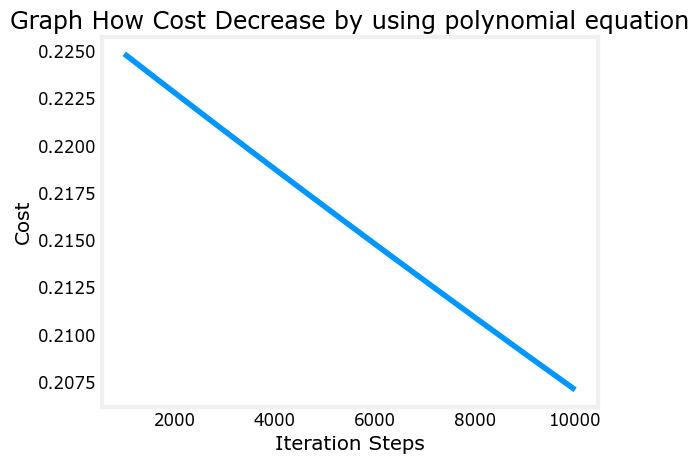

In [11]:
# earlyer we are using equation f_wb = w.x+b
# but now we are using the eqy=uation f_wb = w.x^2+b
# hence now in model we dont give X_Train insted we give X_Train^2

X_Train_2 = X_Train**2 # This step is known as feature engineer because we generate new feature by using previous feature 

#lets now run the Gradient descent on a polynomial equation with lesser value of alpha 
W, B, history =  Compute_Gradient_Descent(X_Train_2,Y_Train,0,0,10000,1e-5)

plt.plot(1000 + np.arange(len(history[1000:])), history[1000:])
plt.xlabel("Iteration Steps")
plt.ylabel("Cost")
plt.title("Graph How Cost Decrease by using polynomial equation")

In [59]:
# now lets pridect the Yhat from same data which was taken during tranning
print(f"new w : {W}, new b ={B}")

Yhat_New = X_Train_2*W + B

print("\n Yhat = \n",Yhat)

new w : [1.], new b =[0.05]

 Yhat = 
 [[ 0.05]
 [ 1.05]
 [ 2.06]
 [ 3.06]
 [ 4.07]
 [ 5.07]
 [ 6.07]
 [ 7.08]
 [ 8.08]
 [ 9.09]
 [10.09]
 [11.09]
 [12.1 ]
 [13.1 ]
 [14.11]
 [15.11]
 [16.12]
 [17.12]
 [18.12]
 [19.13]]


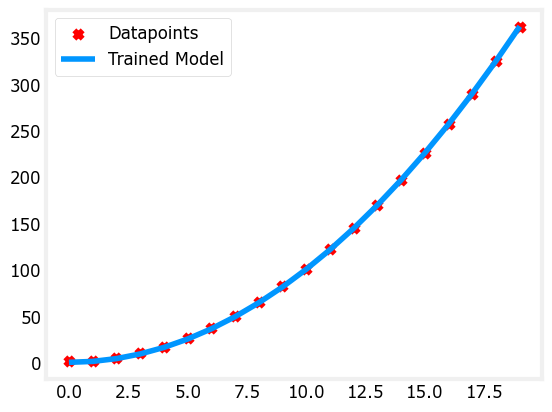

In [60]:
# now lets again plot our data point and trained model

plt.scatter(X_Train,Y_Train,marker="x",c="red",label="Datapoints")
plt.plot(X_Train,Yhat_New,label="Trained Model")
plt.legend()
plt.show()

Now look at her how great our mother has been fitting to the data point by using just polynomial equation instead of linear equation

### Scaling features
As described in the last lab, if the data set has features with significantly different scales, one should apply feature scaling to speed gradient descent. In the example above, there is $x$, $x^2$ and $x^3$ which will naturally have very different scales. Let's apply Z-score normalization to our example.

In [12]:
# Here we can see that by using featured scaling we can decrease the range of the data so that it becomes easy for training the model
# create target data
x = np.arange(0,20,1)
X = np.c_[x, x**2, x**3]
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X,axis=0)}")

# add mean_normalization 
X = zscore_normalize_features(X)     
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in Normalized X:[3.3  3.18 3.28]


### Complex Functions
With feature engineering, even quite complex functions can be modeled:

In [18]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)
yhat=np.dot(X,model_w) + model_b



Iteration         0, 0.2248870612802319
Iteration    100000, 0.02310614729758682
Iteration    200000, 0.018361895228253915
Iteration    300000, 0.014794990718902407
Iteration    400000, 0.01211135260352814
Iteration    500000, 0.010091430509275872
Iteration    600000, 0.0085702506156063
Iteration    700000, 0.0074238487656690805
Iteration    800000, 0.006559076150979923
Iteration    900000, 0.0059059391321666975
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


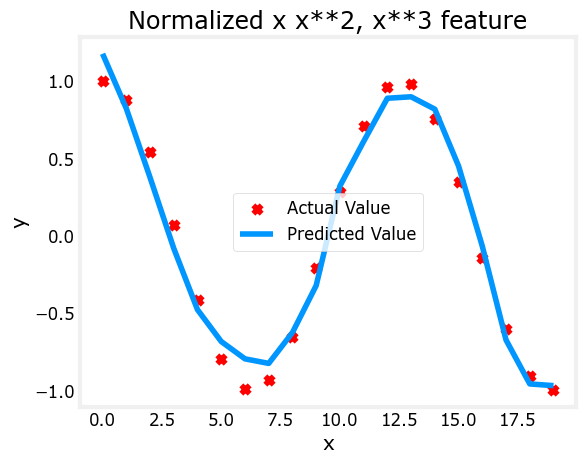

In [19]:
plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,yhat, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()

Here we can see that we have successfully fitted the cost function target variable using high order polynomial equation 